## Machine Learning Model as a Service

In [75]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [4]:
iris_data = load_iris()

In [6]:
iris_data['DESCR']

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [7]:
X, y = iris_data['data'], iris_data['target']
columns = iris_data['feature_names']

In [9]:
X[:2]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2]])

In [11]:
y[:2]

array([0, 0])

In [12]:
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Plotting 2 columns

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
X[:, 0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

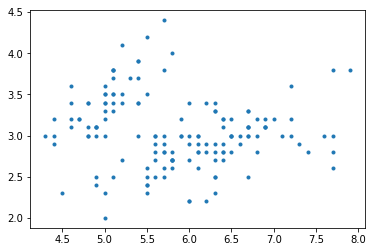

In [21]:
plt.plot(X[:, 0], X[:, 1], '.')

In [36]:
category = set(y)
color = ['red', 'green', 'blue']
color_code = dict(zip(category, color))
color_code

{0: 'red', 1: 'green', 2: 'blue'}

    Adding one more column in numpy array and converting it to pandas dataframe

In [42]:
plot_points = np.hstack((X[:, :2], y.reshape(-1, 1)))
plot_points = pd.DataFrame(plot_points)

In [43]:
plot_points[:3]

,0,1,2
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0


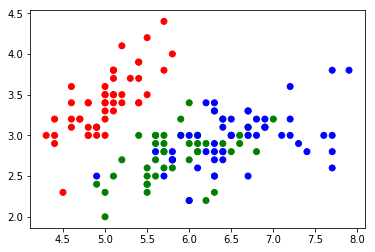

In [54]:
plt.scatter(plot_points[0], plot_points[1], c=plot_points[2].apply(lambda x: color_code[x]))

import matplotlib.pyplot as plt
import pandas as pd

carat = [5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30]
price = [100, 100, 200, 200, 300, 300, 400, 400, 500, 500, 600, 600]
color =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G',]

df = pd.DataFrame(dict(carat=carat, price=price, color=color))

fig, ax = plt.subplots()

colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}

ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

plt.show()

## Splitting the dataset into train and test

In [57]:
dataset = np.hstack((X, y.reshape(-1, 1)))

In [66]:
np.random.shuffle(dataset)

X_train, X_test, y_train, y_test = train_test_split(dataset[:, :4], dataset[:, 4], test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [67]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
y_pred = clf.predict(X_test)

In [73]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.9


In [74]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 11,  3],
       [ 0,  0,  6]])

In [72]:
clf.score(X_test, y_test)

0.90000000000000002

## Saving the model

In [78]:
from sklearn.externals import joblib

In [85]:
joblib.dump(clf, 'MLaaS/iris.model')

['MLaaS/iris.model']

## Loading the model

In [86]:
clf2 = joblib.load('MLaaS/iris.model')

In [98]:
q = np.array([ 4.9,  3. ,  1.4,  0.2], dtype=np.float32).reshape(1, -1)

In [99]:
clf2.predict(q)

array([ 0.])

In [100]:
colors_pred = [color_code[x] for x in clf2.predict(q)]
colors_pred

['red']